<a href="https://colab.research.google.com/github/nferrucho/NPL/blob/main/curso2/ciclo5/Ejemplos_Nov_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Data Load

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

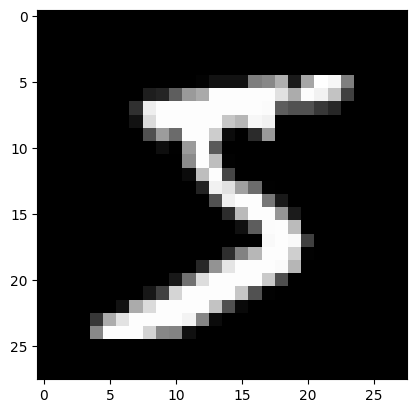

In [ ]:
plt.imshow(x_train[0], cmap='gray')

In [ ]:
x_train = x_train[y_train < 2]
y_train = y_train[y_train < 2]
x_test = x_test[y_test < 2]
y_test = y_test[y_test < 2]

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=uint8), array([5923, 6742]))

In [ ]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=uint8), array([ 980, 1135]))

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_test = keras.utils.to_categorical(y_test, num_classes=2)

## Keras Tuner

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.3 MB/s eta 0:00:00


In [ ]:
import keras_tuner

In [ ]:
def create_model(units, activation, dropout, lr):

    model = keras.Sequential()
    model.add(layers.Flatten())
    model.add(layers.Dense(units=units, activation=activation))
    if dropout:
        model.add(layers.Dropout(rate=0.25))
   # model.add(layers.Dense(units=units2, activation=activation2))
    model.add(layers.Dense(2, activation="softmax"))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

    return model

In [ ]:
setting = {"units_min": 32,
           "units_max": 512,
           "units_step": 16,
           "activation_options": ["relu", "tanh"],
           "lr_min": 1e-4,
           "lr_max": 1e-2,
           "lr_sampling": "log"}

def hypermodel(hp):
    hidden_units = hp.Int("units_1", min_value=setting["units_min"], max_value=setting["units_max"], step=setting["units_step"])
    #hidden_units_2 = hp.Int("units_2", min_value=setting["units_min"], max_value=setting["units_max"], step=setting["units_step"])
    activation = hp.Choice("activation", setting["activation_options"])
    dropout = hp.Boolean("dropout")
    lr = hp.Float("lr", min_value=setting["lr_min"], max_value=setting["lr_max"], sampling=setting["lr_sampling"])
    # call existing model-building code with the hyperparameter values.
    model = create_model(
        units=hidden_units, activation=activation, dropout=dropout, lr=lr
    )
    return model

In [ ]:
hypermodel(keras_tuner.HyperParameters())

<Sequential name=sequential, built=False>

In [ ]:
tuner = keras_tuner.RandomSearch(
    hypermodel=hypermodel,
    objective="val_accuracy",
    max_trials=5,
    project_name="keras_tuner",
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 16, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [ ]:
tuner.search(x_train, y_train, epochs=3, validation_split=0.2)

Trial 5 Complete [00h 00m 09s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 00m 51s


In [ ]:
tuner.results_summary()

Results summary
Results in ./keras_tuner
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
units_1: 64
activation: tanh
dropout: True
lr: 0.000889531227382006
Score: 1.0

Trial 2 summary
Hyperparameters:
units_1: 480
activation: relu
dropout: True
lr: 0.000421873393590671
Score: 1.0

Trial 4 summary
Hyperparameters:
units_1: 288
activation: relu
dropout: True
lr: 0.0011278115647537267
Score: 1.0

Trial 1 summary
Hyperparameters:
units_1: 112
activation: relu
dropout: True
lr: 0.0019355289844175982
Score: 0.9996052384376526

Trial 3 summary
Hyperparameters:
units_1: 256
activation: relu
dropout: True
lr: 0.0004766522588100132
Score: 0.9996052384376526


In [ ]:
models = tuner.get_best_models(num_models=1)
best_model = models[0]
best_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,370 (196.76 KB)

 Trainable params: 50,370 (196.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
best_model.evaluate(x_test, y_test)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 5.3557e-04


[0.0020598615519702435, 0.9995272159576416]

## AutoEncoder as a mecanism for dimensional reduction

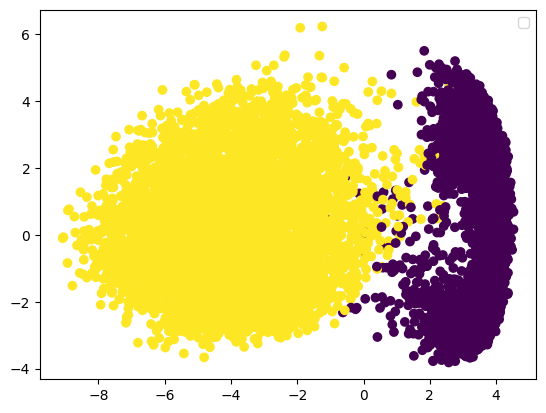

In [ ]:
from sklearn.decomposition import PCA

x_train_pca = PCA(n_components=2).fit_transform(x_train.reshape(x_train.shape[0], -1))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train[:, 0])
plt.legend()

In [ ]:
encoder = keras.Sequential(
    [
        layers.Input(shape=(28, 28)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(2, activation="relu")
    ])

decoder = keras.Sequential(
    [
        layers.Dense(32, activation="sigmoid"),
        layers.Dense(128, activation="sigmoid"),
        layers.Dense(784, activation='sigmoid'),
        layers.Reshape((28, 28))
    ])

autoencoder = keras.Sequential(
    [
        encoder,
        decoder
    ])

autoencoder

<Sequential name=sequential_2, built=False>

In [ ]:
autoencoder.compile(optimizer='adam',
                    loss=keras.losses.MeanSquaredError(),
                    metrics=["mae","mse"])

In [ ]:
history = autoencoder.fit(x=x_train,
                y=x_train,
                epochs=10,
                shuffle=False,
                validation_data=(x_test, x_test))

Epoch 1/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 0.0840 - mae: 0.2086 - mse: 0.0840 - val_loss: 0.0456 - val_mae: 0.1202 - val_mse: 0.0456
Epoch 2/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0449 - mae: 0.1155 - mse: 0.0449 - val_loss: 0.0433 - val_mae: 0.1071 - val_mse: 0.0433
Epoch 3/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0431 - mae: 0.1071 - mse: 0.0431 - val_loss: 0.0413 - val_mae: 0.1020 - val_mse: 0.0413
Epoch 4/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0404 - mae: 0.1016 - mse: 0.0404 - val_loss: 0.0370 - val_mae: 0.0946 - val_mse: 0.0370
Epoch 5/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0362 - mae: 0.0936 - mse: 0.0362 - val_loss: 0.0333 - val_mae: 0.0864 - val_mse: 0.0333
Epoch 6/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0329 - mae: 0.0856 - mse: 0.0329 - val_loss: 0.0318 - val_mae: 0.0816 - val_mse: 0.0318
Epoch 7/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0313 - mae: 0.0811 - mse: 0.0313 - v

In [ ]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

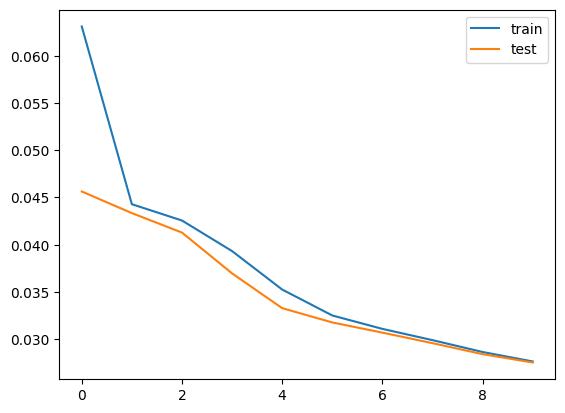

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

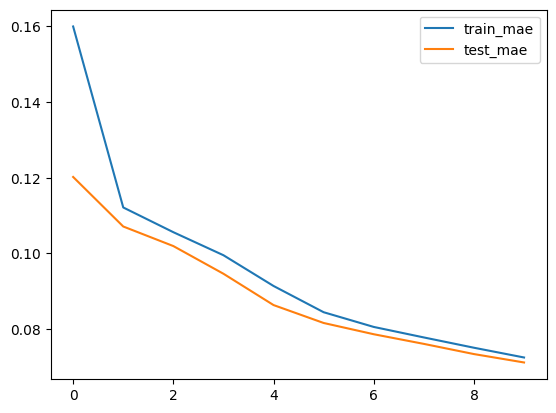

In [ ]:
plt.plot(history.history['mae'], label='train_mae')
#plt.plot(history.history['mse'], label='train_mse')
plt.plot(history.history['val_mae'], label='test_mae')
#plt.plot(history.history['val_mse'], label='test_mse')

plt.legend()

In [ ]:
encoded_imgs = encoder(x_train.reshape(-1, 28, 28)).numpy()

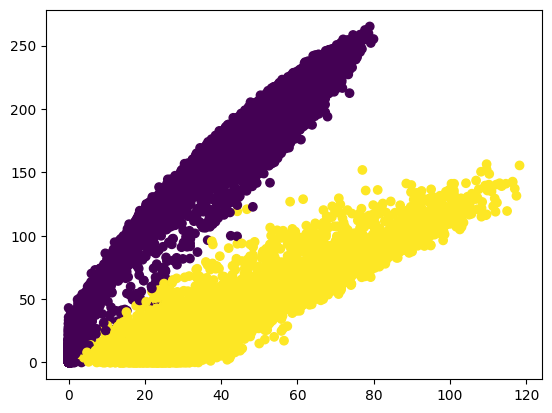

In [ ]:
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_train[:, 0])

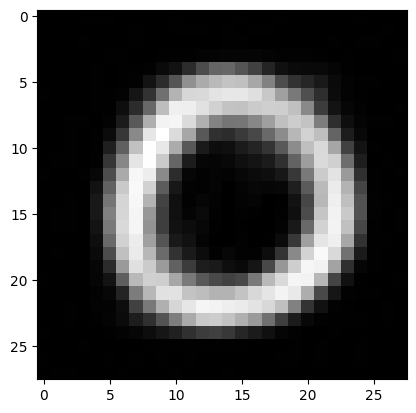

In [ ]:
latent = tf.constant([25,10]) #punto del lado 0 (amarillo)
img = decoder(tf.reshape(latent, (1,2))).numpy().reshape(28, 28)
plt.imshow(img, cmap='gray')

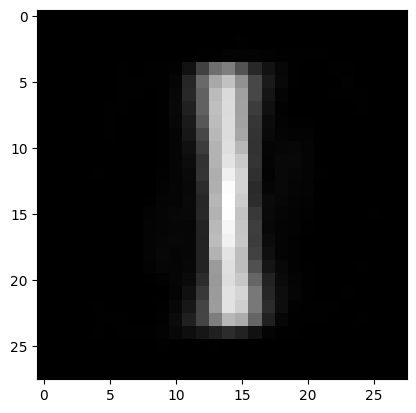

In [ ]:
latent = tf.constant([50,180]) #punto del lado 1 (violeta)
img = decoder(tf.reshape(latent, (1,2))).numpy().reshape(28, 28)
plt.imshow(img, cmap='gray')

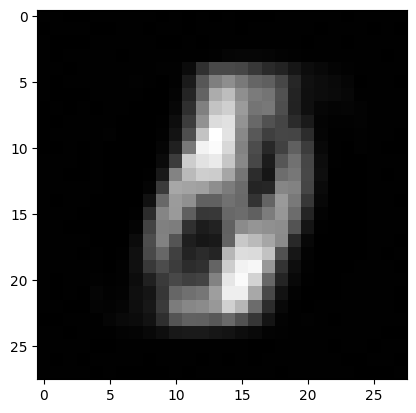

In [ ]:
latent = tf.constant([20,50]) #punto en la frontera
img = decoder(tf.reshape(latent, (1,2))).numpy().reshape(28, 28)
plt.imshow(img, cmap='gray')

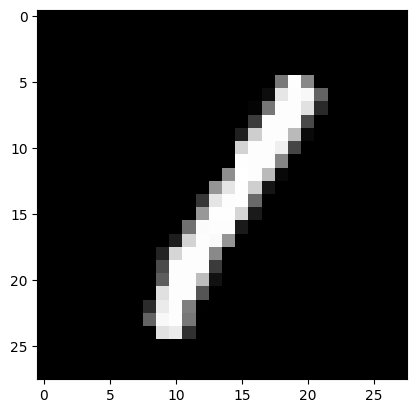

In [ ]:
z = x_train[6]
plt.imshow(z, cmap='gray')

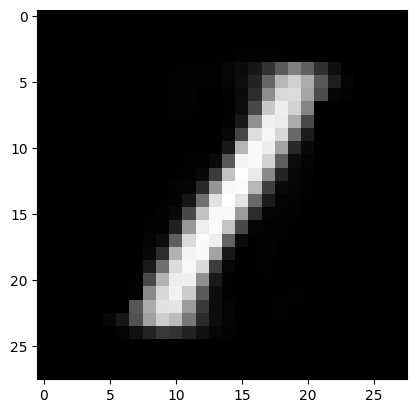

In [ ]:
z_hat = decoder(encoder(tf.reshape(z, (1,28,28))).numpy()).numpy().reshape(28, 28)
plt.imshow(z_hat, cmap='gray')